In [ ]:
# INSTALL OpenVINO™ integration with TensorFlow

In [22]:
# Upload the required wheel files, models and images in a google drive folder
# Uncomment and run the below command to copy them in your current workspace
#!cp /content/drive/MyDrive/TF-OV/working_dir_files/* . 

!pip install --upgrade pip
!pip install pillow

# Install stock TensorFlow
!pip install tensorflow==2.4.1 

# Install OpenVINO™ integration with TensorFlow
!pip install openvino_tensorflow-0.5.0-cp37-cp37m-manylinux2014_x86_64.whl

Processing ./openvino_tensorflow-0.5.0-cp37-cp37m-manylinux2014_x86_64.whl
openvino-tensorflow is already installed with the same version as the provided wheel. Use --force-reinstall to force an installation of the wheel.


In [4]:
!ldd --version

ldd (Ubuntu GLIBC 2.27-3ubuntu1.2) 2.27
Copyright (C) 2018 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.
Written by Roland McGrath and Ulrich Drepper.


# Inference Examples

## SETUP helper functions

In [12]:
from __future__ import absolute_import, division, print_function, unicode_literals
from tensorflow.keras import backend as K
from IPython.display import HTML

import tensorflow as tf
import numpy as np
from PIL import Image
import sys, getopt
import time
import argparse
import matplotlib.pyplot as plt
import os
import cv2
import openvino_tensorflow


In [13]:
def load_pb(path_to_pb):
  with tf.compat.v1.gfile.GFile(path_to_pb, "rb") as f:
    graph_def = tf.compat.v1.GraphDef()
    graph_def.ParseFromString(f.read())
  with tf.Graph().as_default() as graph:
    tf.import_graph_def(graph_def, name='')
  return graph

In [14]:
def run_infer(pb_file, input_name, output_name, images_list, num_iterations, inf_time, device, ovtf):

  if (ovtf == "true"):  
    openvino_tensorflow.enable()
    print("OpenVINO integration with Tensorflow Activated")
    openvino_tensorflow.set_backend(device)
  else: 
    openvino_tensorflow.disable()



  print("CREATE MODEL - BEGIN")
  #Read the frozen model file
  model = load_pb(pb_file)
  print("CREATE MODEL - END")
  
  print("PREDICTION - BEGIN") 

  #Execute the inference
  with tf.compat.v1.Session(graph=model) as sess:

    #Get the input tensor shape
    input_shape = tf.compat.v1.get_default_graph().get_tensor_by_name(input_name).shape
    img = []
    xlist = []
    #Load the input images
    for image_path in images_list:
      print("Image path: ", image_path)
      img1 = Image.open(image_path).resize([input_shape[1],input_shape[2]])
      x1 = np.asarray(img1)
      x1 = (x1/255.0)
      xlist.append(x1)
    x = np.stack(xlist)

    total_inf_time = 0
    inf_count = 0
    try:
      prob_tensor = model.get_tensor_by_name(output_name)
      for i in range(num_iterations):
        if inf_time:
          inf_time = time.time()
        preds = sess.run(prob_tensor, {input_name:x})
        if inf_time:
          inf_time = time.time() - inf_time
          print("Inf Execution Time [", i, "]: ", inf_time * 1000, " ms" )
          if i > 0:
              total_inf_time += inf_time
              inf_count += 1
    except KeyError:
      print("Couldn't find classification output layer: " + output_layer + ".")
      exit(-1)
  
  print("PREDICTION - END")  

  #Load the class names
  with open('labels.txt') as file:
    labels = file.readlines()
    
  for j in range(len(preds)):
    #Sort the prediction results
    sorted_idx = np.argsort(preds[j])
    img1 = Image.open(images_list[j]).resize([input_shape[1],input_shape[2]])
    plt.imshow(img1)
    plt.show()
    

    #Print the names of top 3 predictions
    print("Predictions:")
    for i in range(3):
      cls_index = sorted_idx[-(i+1)]
      print("\t",labels[cls_index-1].strip()," (", "{:.8f}".format(preds[j][cls_index]),")")


  print("\nAvg Inference Time: ",(total_inf_time * 1000/inf_count), " ms")

# INFER - RESNET50

Running Inference on Stock TensorFlow
CREATE MODEL - BEGIN
CREATE MODEL - END
PREDICTION - BEGIN
Image path:  cat.jpg
Inf Execution Time [ 0 ]:  825.3300189971924  ms
Inf Execution Time [ 1 ]:  160.8285903930664  ms
Inf Execution Time [ 2 ]:  155.1804542541504  ms
Inf Execution Time [ 3 ]:  152.54712104797363  ms
Inf Execution Time [ 4 ]:  156.75640106201172  ms
Inf Execution Time [ 5 ]:  152.7547836303711  ms
Inf Execution Time [ 6 ]:  153.02038192749023  ms
Inf Execution Time [ 7 ]:  157.39965438842773  ms
Inf Execution Time [ 8 ]:  152.2352695465088  ms
Inf Execution Time [ 9 ]:  151.68237686157227  ms
Inf Execution Time [ 10 ]:  164.6440029144287  ms
Inf Execution Time [ 11 ]:  150.69270133972168  ms
Inf Execution Time [ 12 ]:  157.01651573181152  ms
Inf Execution Time [ 13 ]:  151.60560607910156  ms
Inf Execution Time [ 14 ]:  172.91688919067383  ms
Inf Execution Time [ 15 ]:  150.9239673614502  ms
Inf Execution Time [ 16 ]:  156.03041648864746  ms
Inf Execution Time [ 17 ]:  151.

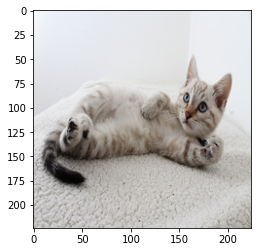

Predictions:
	 Egyptian cat  ( 0.76337874 )
	 tabby, tabby cat  ( 0.18189785 )
	 tiger cat  ( 0.04990822 )

Avg Inference Time:  155.74302171405992  ms
Running Inference using OpenVINO integration with Tensorflow
OpenVINO integration with Tensorflow Activated
CREATE MODEL - BEGIN
CREATE MODEL - END
PREDICTION - BEGIN
Image path:  cat.jpg
Inf Execution Time [ 0 ]:  1667.452335357666  ms
Inf Execution Time [ 1 ]:  129.38809394836426  ms
Inf Execution Time [ 2 ]:  128.05557250976562  ms
Inf Execution Time [ 3 ]:  117.05422401428223  ms
Inf Execution Time [ 4 ]:  118.63040924072266  ms
Inf Execution Time [ 5 ]:  118.1190013885498  ms
Inf Execution Time [ 6 ]:  126.80268287658691  ms
Inf Execution Time [ 7 ]:  116.64485931396484  ms
Inf Execution Time [ 8 ]:  124.63855743408203  ms
Inf Execution Time [ 9 ]:  119.20523643493652  ms
Inf Execution Time [ 10 ]:  123.31748008728027  ms
Inf Execution Time [ 11 ]:  119.56405639648438  ms
Inf Execution Time [ 12 ]:  118.99018287658691  ms
Inf Execu

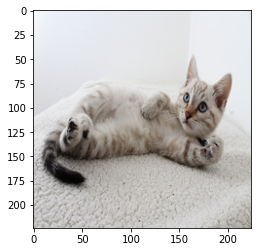

Predictions:
	 Egyptian cat  ( 0.76338035 )
	 tabby, tabby cat  ( 0.18189701 )
	 tiger cat  ( 0.04990818 )

Avg Inference Time:  120.80009360062449  ms


In [15]:
pb_file = "resnet_v2_50.pb"

input_name = "input:0"
output_name = "resnet_v2_50/predictions/Softmax:0"
image_list_file = "single_image.txt"
num_iterations = 20
inf_time = "true"
device = "CPU"

images_list = []
imgs_file = open(image_list_file, 'r')
lines = imgs_file.readlines()
for line in lines:
  images_list.append(line.strip())

print("Running Inference on Stock TensorFlow")
ovtf = "false"
run_infer(pb_file, input_name, output_name, images_list, num_iterations, inf_time, device, ovtf)


print("Running Inference using OpenVINO integration with Tensorflow")
ovtf = "true"
run_infer(pb_file, input_name, output_name, images_list, num_iterations, inf_time, device, ovtf)

# INFER - RESNET 101

Running Inference on Stock TensorFlow
CREATE MODEL - BEGIN
CREATE MODEL - END
PREDICTION - BEGIN
Image path:  cat.jpg
Inf Execution Time [ 0 ]:  1298.8483905792236  ms
Inf Execution Time [ 1 ]:  285.5496406555176  ms
Inf Execution Time [ 2 ]:  298.9659309387207  ms
Inf Execution Time [ 3 ]:  287.5697612762451  ms
Inf Execution Time [ 4 ]:  294.2984104156494  ms
Inf Execution Time [ 5 ]:  297.90353775024414  ms
Inf Execution Time [ 6 ]:  307.02972412109375  ms
Inf Execution Time [ 7 ]:  286.41271591186523  ms
Inf Execution Time [ 8 ]:  292.4039363861084  ms
Inf Execution Time [ 9 ]:  300.0030517578125  ms
Inf Execution Time [ 10 ]:  289.7958755493164  ms
Inf Execution Time [ 11 ]:  293.46394538879395  ms
Inf Execution Time [ 12 ]:  289.9744510650635  ms
Inf Execution Time [ 13 ]:  293.9317226409912  ms
Inf Execution Time [ 14 ]:  289.776086807251  ms
Inf Execution Time [ 15 ]:  289.8693084716797  ms
Inf Execution Time [ 16 ]:  297.1920967102051  ms
Inf Execution Time [ 17 ]:  295.521259

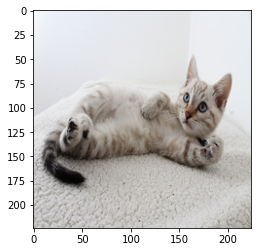

Predictions:
	 cinema, movie theater, movie theatre, movie house, picture palace  ( 0.06786889 )
	 obelisk  ( 0.03617353 )
	 dishrag, dishcloth  ( 0.02968519 )

Avg Inference Time:  293.32049269425244  ms
Running Inference using OpenVINO integration with Tensorflow
OpenVINO integration with Tensorflow Activated
CREATE MODEL - BEGIN
CREATE MODEL - END
PREDICTION - BEGIN
Image path:  cat.jpg
Inf Execution Time [ 0 ]:  2498.882532119751  ms
Inf Execution Time [ 1 ]:  232.33795166015625  ms
Inf Execution Time [ 2 ]:  230.91411590576172  ms
Inf Execution Time [ 3 ]:  232.61237144470215  ms
Inf Execution Time [ 4 ]:  236.78851127624512  ms
Inf Execution Time [ 5 ]:  254.6229362487793  ms
Inf Execution Time [ 6 ]:  231.32014274597168  ms
Inf Execution Time [ 7 ]:  235.02779006958008  ms
Inf Execution Time [ 8 ]:  239.4082546234131  ms
Inf Execution Time [ 9 ]:  236.2957000732422  ms
Inf Execution Time [ 10 ]:  233.47902297973633  ms
Inf Execution Time [ 11 ]:  228.2264232635498  ms
Inf Execut

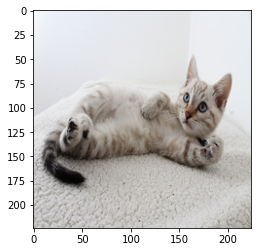

Predictions:
	 cinema, movie theater, movie theatre, movie house, picture palace  ( 0.06786844 )
	 obelisk  ( 0.03617334 )
	 dishrag, dishcloth  ( 0.02968536 )

Avg Inference Time:  235.40082730745016  ms


In [17]:
pb_file = "resnet101_fp32_pretrained_model.pb"
output_name = "resnet_v1_101/predictions/Reshape_1:0"

print("Running Inference on Stock TensorFlow")
ovtf = "false"
run_infer(pb_file, input_name, output_name, images_list, num_iterations, inf_time, device, ovtf)

print("Running Inference using OpenVINO integration with Tensorflow")
ovtf = "true"
run_infer(pb_file, input_name, output_name, images_list, num_iterations, inf_time, device, ovtf)
